# Production, Cash Price, Feedlot Capacity

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import src

import warnings
warnings.filterwarnings('ignore')

/Users/ericostring/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/ericostring/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


#### Production (LB)

In [2]:
production = pd.read_csv('../csv/production_incl_calves.csv')
production = src.usda_clean_annual(production, historical=True)

<AxesSubplot:title={'center':'Production (LB)'}, ylabel='Value'>

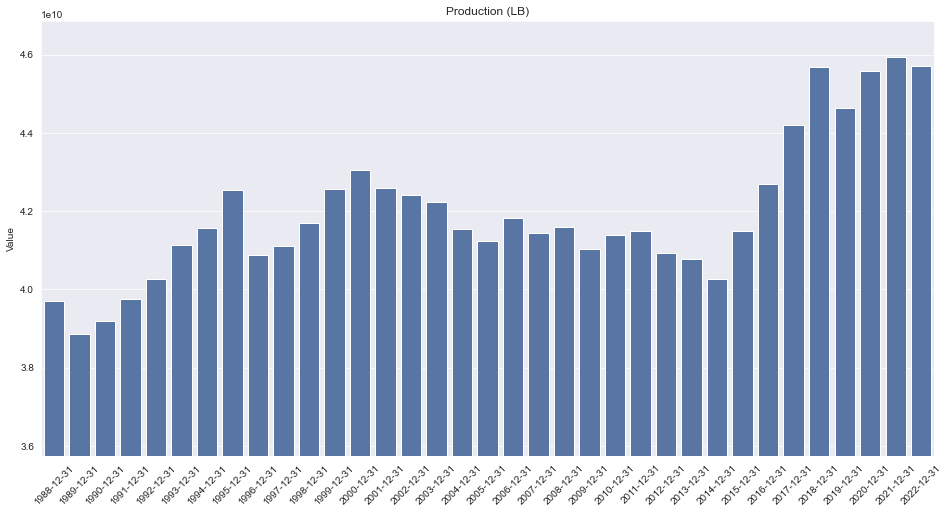

In [3]:
src.barplot(production, title="Production (LB)", ylim=0.1)

In [4]:
price_received_ge_500_national = pd.read_csv('../csv/price_received_ge_500_national.csv')
price_received_ge_500_national = src.usda_clean_monthly(price_received_ge_500_national, historical=True)
adj_price_received_ge_500_national = src.adjust_series_cpi(price_received_ge_500_national)

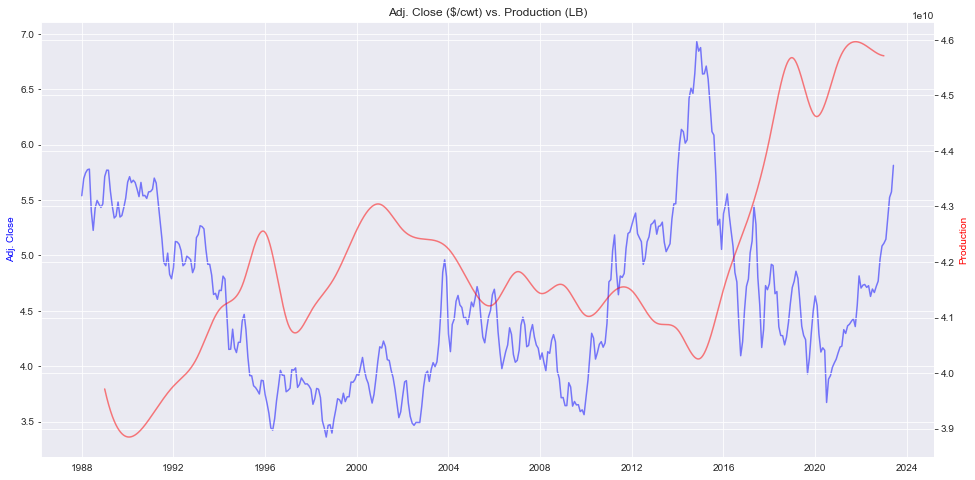

In [27]:
src.lineplot_2_own_axis(
    adj_price_received_ge_500_national[adj_price_received_ge_500_national.index.year >= 1988],
    src.cubicspline(production),
    'Adj. Close',
    'Production',
    title='Adj. Close ($/cwt) vs. Production (LB)'
    )

In [6]:
df = pd.DataFrame(
    {'adj_price_received_ge_500_national_pct_change': adj_price_received_ge_500_national.resample('Y').mean().pct_change()*100,
     'production_pct_change': production.resample('Y').last().pct_change()*100
    })

In [20]:
import statsmodels.api as sm

model = sm.OLS(df['adj_price_received_ge_500_national_pct_change'], sm.add_constant(df['production_pct_change'])).fit()

print(model.summary())

                                          OLS Regression Results                                         
Dep. Variable:     adj_price_received_ge_500_national_pct_change   R-squared:                       0.081
Model:                                                       OLS   Adj. R-squared:                  0.052
Method:                                            Least Squares   F-statistic:                     2.803
Date:                                           Fri, 15 Sep 2023   Prob (F-statistic):              0.104
Time:                                                   18:03:00   Log-Likelihood:                -120.43
No. Observations:                                             34   AIC:                             244.9
Df Residuals:                                                 32   BIC:                             247.9
Df Model:                                                      1                                         
Covariance Type:                              

- Annual %∆ in mean cash price (CPI adjusted) is negatively associated with %∆ in production of live cattle with a coefficient of -1.42
    - Nearly statistically significant at 10% level
- R-squared is 0.081 - production alone does not explain much of the variation in price change

No handles with labels found to put in legend.


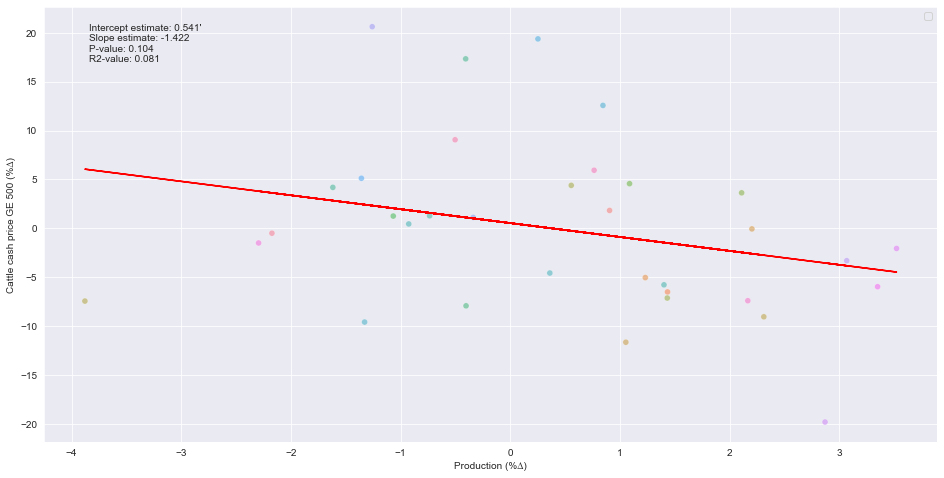

In [23]:
src.scatterplot(
    df['adj_price_received_ge_500_national_pct_change'],
    df['production_pct_change'],
    'Cattle cash price GE 500 (%∆)',
    'Production (%∆)',
    reg=True
)

- %∆ in price varies more than %∆ in production

#### Feed Capacity (Head)

In [12]:
feed_capacity = pd.read_csv('../csv/feed_capacity.csv')
feed_capacity = src.usda_clean_annual(feed_capacity, end_of_year=False, historical=True)

<AxesSubplot:title={'center':'Feed Capacity (Head)'}, ylabel='Value'>

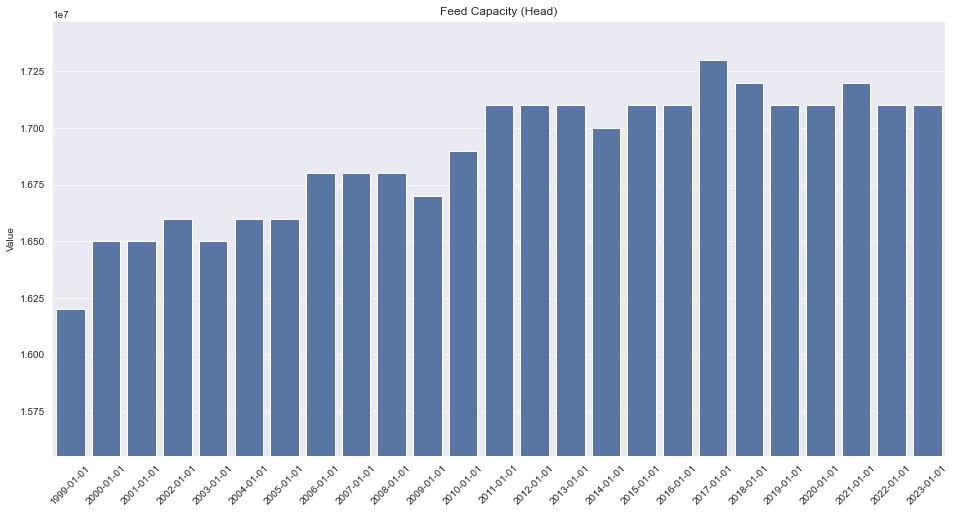

In [13]:
src.barplot(feed_capacity, ylim=0.05, title="Feed Capacity (Head)")

- Throughout 2000-2015 price was increasing and production was decreasing, yet feedlot capacity was increasing?
    - Perhaps feedlots were increasing capacity due to increasing prices in anticipation to fill these and capture the higher prices, but the sourcing of feeder cattle was a bottleneck?

### Replacement Heifers (Head)

In [14]:
inv_heifers_ge_500_beef_repl = pd.read_csv('../csv/inventory_heifers_ge_500_beef_repl.csv')
inv_heifers_ge_500_beef_repl = src.usda_clean_biannual(inv_heifers_ge_500_beef_repl)

<AxesSubplot:title={'center':'CATTLE, HEIFERS, GE 500 LBS, BEEF REPLACEMENT - INVENTORY'}>

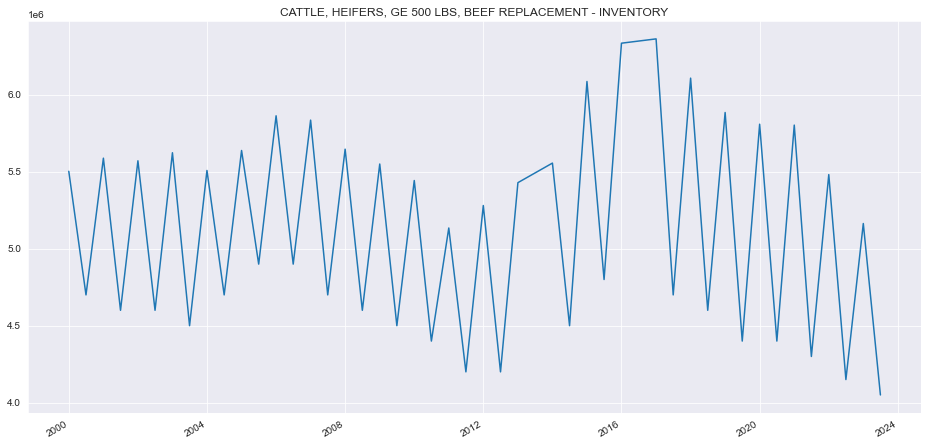

In [15]:
inv_heifers_ge_500_beef_repl.plot(title='CATTLE, HEIFERS, GE 500 LBS, BEEF REPLACEMENT - INVENTORY')

- Biannual data clearly has higher values during first half then second half, however this is not true in two instances?
    - Perhaps to do with reporting methodology? Contact NASS for confirmation

<AxesSubplot:title={'center':'Beef Replacement Heifers (Head)'}>

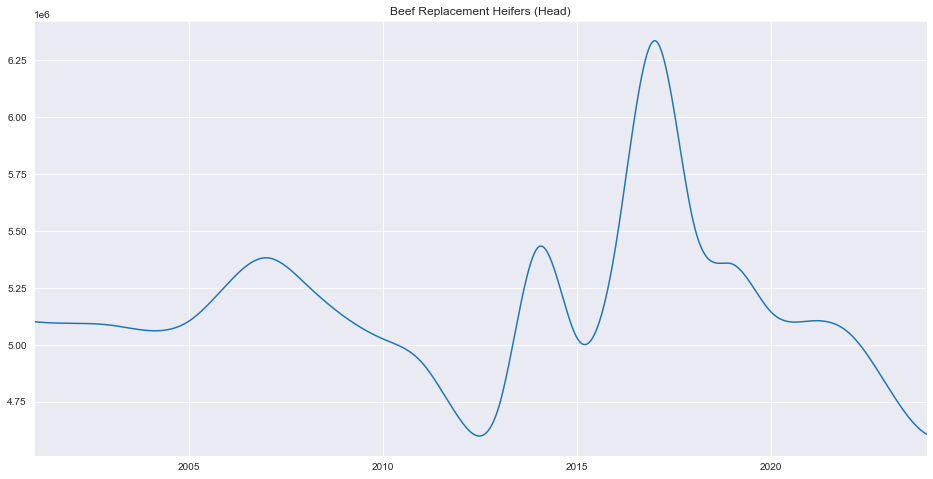

In [16]:
src.cubicspline(inv_heifers_ge_500_beef_repl.resample('Y').mean()).plot(title='Beef Replacement Heifers (Head)')

- Heifers are clearly not being retained

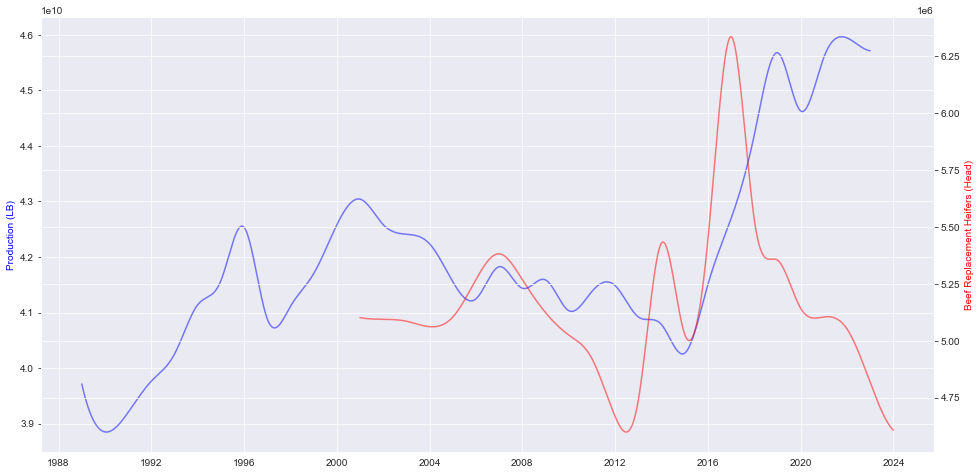

In [17]:
src.lineplot_2_own_axis(
    src.cubicspline(production.resample('Y').mean()),
    src.cubicspline(inv_heifers_ge_500_beef_repl.resample('Y').mean()),
    'Production (LB)',
    'Beef Replacement Heifers (Head)'
)

- Production in LB has been increasing since 2015 bottom, and plateaued at 2019
    - The initial increase in production was due to more heifers, however the sustained high production is probably due to heifers being culled rather than retained for calving
    - This ofcourse is not sustainable
    - If this is the case, we expect inventory in heads to increase from 2015-2019 (as production increases driven by new cattle), then drop (as sustain in productionis driven by cull cows)

#### Inventory (Head)

<AxesSubplot:>

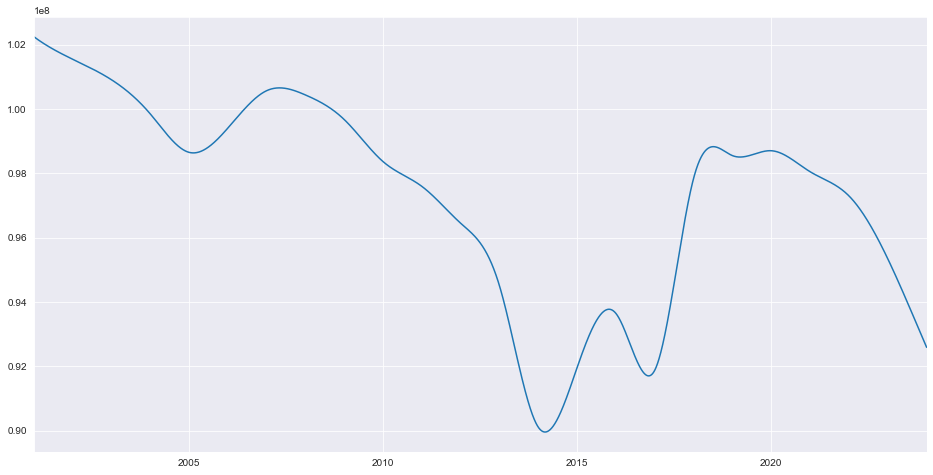

In [18]:
inv_incl_calves = pd.read_csv('../csv/inventory_incl_calves.csv')
inv_incl_calves = src.usda_clean_biannual(inv_incl_calves)
src.cubicspline(inv_incl_calves.resample('Y').mean()).plot()

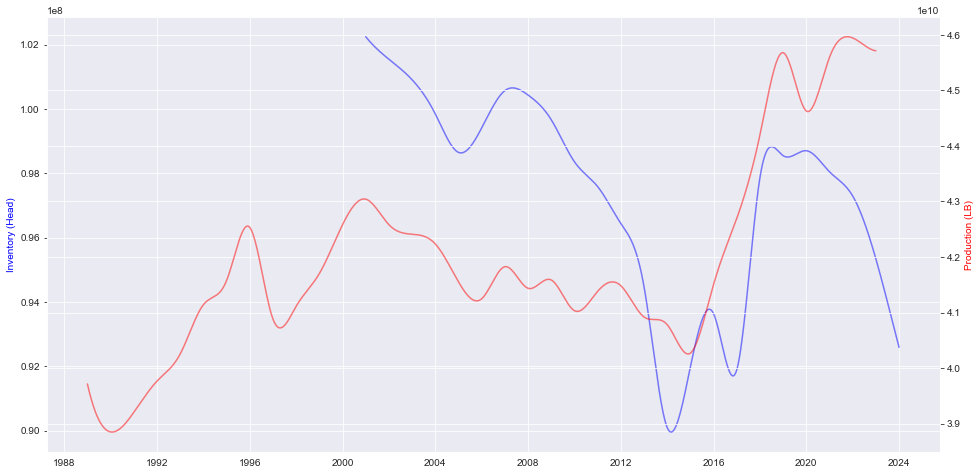

In [19]:
src.lineplot_2_own_axis(
    src.cubicspline(inv_incl_calves.resample('Y').mean()),
    src.cubicspline(production.resample('Y').mean()),
    'Inventory (Head)',
    'Production (LB)',
)

- Check the number of cull cows --> expect this to increase sharply after 2019